## Visualize MRI Brain Slices



In [67]:
import numpy as np
from nilearn.signal import clean
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline


In [68]:
#Load in numpy data, 4d transposed image

img_4d = np.load('data/subject_10004_08693_4d.npy')
img_4d.shape

(79, 95, 79, 144)

plotting layer 31 at time point 139 of Image


(-0.5, 94.5, 78.5, -0.5)

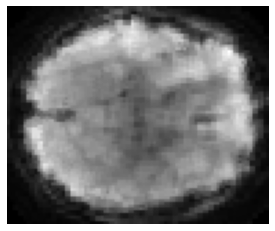

In [38]:
# Visualize a layer of the image

maxval = 94

layer = np.random.randint(0, maxval)

time_point = 139
print(f"plotting layer {layer} at time point {time_point} of Image")
plt.imshow(img_4d[:,:,layer, time_point], cmap = 'gray')
plt.axis('off')

In [70]:
# Visualize all the layers of the brain at a specific time point
time_point = 139

def explore_4d_img(layer):
    plt.figure(figsize = (10, 5))
    plt.imshow(img_4d[:, :, layer, time_point], cmap = 'gray')
    plt.title("Layers of the brain")
    plt.axis('off')
    return layer

# Call interactive component of function above at time point 139 
interact(explore_4d_img, layer = (0, img_4d.shape[2] - 1))
plt.show()

interactive(children=(IntSlider(value=39, description='layer', max=78), Output()), _dom_classes=('widget-inter…

## Visualize voxel distributions

In [3]:
# visualize mask image
#Load in numpy data
masked_2d = np.load('data/mask_single_sub.npy')
masked_2d.shape

(84, 237979)

In [18]:
masked_norm_2d = clean(masked_2d,
                       #detrend = settings.detrend,
                       standardize = 'psc'
                       #confounds=confound_signals.values,
                       #low_pass=settings.low_pass,
                       #high_pass=settings.high_pass,
                       #t_r=settings.func.tr)
                      )
masked_norm_2d

/Users/staceyrivet/Library/Python/3.7/lib/python/site-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/Users/staceyrivet/Library/Python/3.7/lib/python/site-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


array([[ 0.       ,  0.       ,  0.       , ...,  3.4595332, -2.7081203,
        -4.08065  ],
       [ 0.       ,  0.       ,  0.       , ...,  3.0718458, -2.8591168,
        -2.5701163],
       [ 0.       ,  0.       ,  0.       , ...,  1.8663439, -4.98893  ,
        -3.2585096],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  3.3766582,  4.5196137,
         6.078048 ],
       [ 0.       ,  0.       ,  0.       , ..., -2.0088224, -1.2887629,
        -3.3319068],
       [ 0.       ,  0.       ,  0.       , ...,  1.0262262, -3.976704 ,
        -2.5131683]], dtype=float32)

In [19]:
masked_norm_2d.shape

(84, 237979)

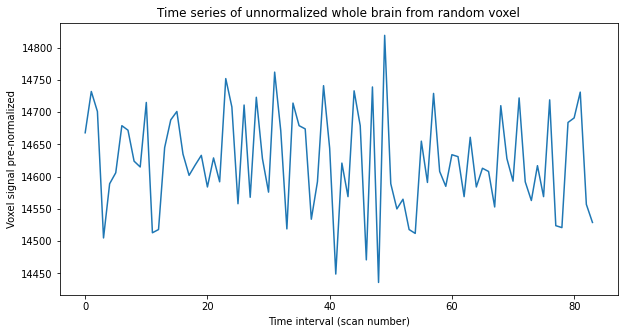

In [14]:
# Plot time series of brain data from a random voxel pre-normalization
voxel = np.random.randint(0, masked_2d.shape[1])
plt.figure(figsize = (10 ,5))
plt.plot(masked_2d[:, voxel])
plt.title("Time series of unnormalized whole brain from random voxel")
plt.xlabel("Time interval (scan number)")
plt.ylabel("Voxel signal pre-normalized")
plt.show()

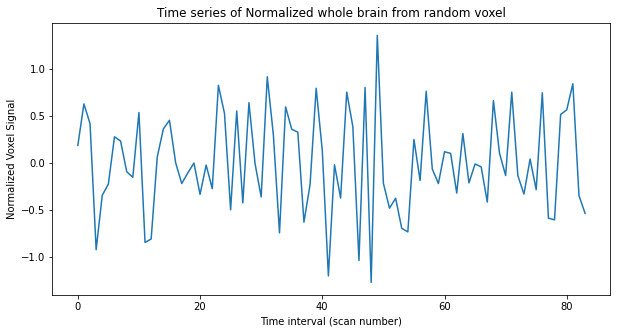

In [20]:
# Plot time series of brain data from a random voxel after normalization
plt.figure(figsize = (10 ,5))
plt.plot(masked_norm_2d[:, voxel])
plt.title("Time series of Normalized whole brain from random voxel")
plt.xlabel("Time interval (scan number)")
plt.ylabel("Normalized Voxel Signal")
plt.show()

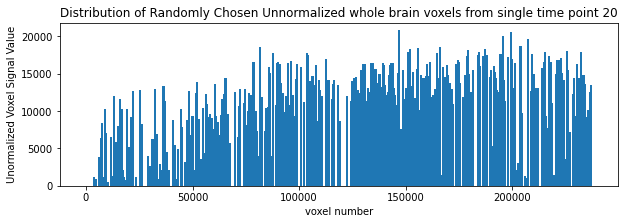

In [65]:
# Plot Unnormalized distribution of voxels at random time point
tp = np.random.randint(0, masked_2d.shape[0])
x_ax = np.sort(np.random.randint(0, len(masked_2d[tp, :]), 500))
y_ax = masked_2d[tp, x_ax]
plt.figure(figsize = (10 ,3))
plt.bar(x_ax, y_ax, width=1000)
plt.title(f"Distribution of Randomly Chosen Unnormalized whole brain voxels from single time point {tp}")
plt.xlabel("voxel number")
plt.ylabel("Unormalized Voxel Signal Value")
plt.show()

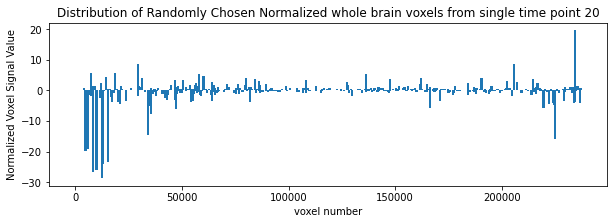

In [66]:
# Plot Normalized voxel distribution at random time point
y_ax = masked_norm_2d[tp, x_ax]
plt.figure(figsize = (10 ,3))
plt.bar(x_ax, y_ax, width=1000)
plt.title(f"Distribution of Randomly Chosen Normalized whole brain voxels from single time point {tp}")
plt.xlabel("voxel number")
plt.ylabel("Normalized Voxel Signal Value")
plt.show()